In [100]:
!pip install scikit-learn==0.23.2

In [37]:
!pip install pyyaml==5.4.1
!pip install plotly --upgrade
!pip install shap --upgrade
!pip install interpret
!pip install interpret-community

     |████████████████████████████████| 636 kB 4.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


     |████████████████████████████████| 25.3 MB 66 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


     |████████████████████████████████| 371 kB 4.1 MB/s 



  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509231 sha256=1a09edc0703951c27e9bce4b33e0c89d9e9200b8a3784c436315c73d1e9f7703
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap
     |████████████████████████████████| 6.6 MB 3.7 MB/s 
     |████████████████████████████████| 3.6 MB 23.1 MB/s 
     |████████████████████████████████| 7.3 MB 64.4 MB/s 
     |████████████████████████████████| 5.8 MB 18.0 MB/s 
     |████████████████████████████████| 790 kB 38.9 MB/s 
     |████████████████████████████████| 125 kB 59.1 MB/s 
     |████████████████████████████████| 756 kB 58.4 MB/s 
     |████████████████████████████████| 296 kB 54.5 MB/s 
     |████████████████████████████████| 275 kB 71.5 MB/s 
   

     |████████████████████████████████| 137 kB 4.1 MB/s 


In [ ]:
pip install pycaret

     |████████████████████████████████| 288 kB 4.3 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 167 kB 53.3 MB/s 
     |████████████████████████████████| 1.3 MB 45.5 MB/s 
     |████████████████████████████████| 6.8 MB 26.7 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 113 kB 60.2 MB/s 
     |████████████████████████████████| 2.0 MB 37.3 MB/s 
     |████████████████████████████████| 1.7 MB 60.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.9 MB 41 kB/s 
     |████████████████████████████████| 261 kB 62.7 MB/s 
     |████████████████████████████████| 303 kB 56.5 MB/s 
     |████████████████████████████████| 102 kB 11.2 MB/s 
     |████████████████████████████████| 62 kB 783 kB/s 
     |█████████████████████

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/MyDrive/ESC_2021_fall_final/

/content/gdrive/MyDrive/ESC_2021_fall_final


In [3]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("./FS_2y_before_Bankruptcy_train_preprocessed.csv")

In [5]:
# 8, 10, 12, 20, 33, 40, 42, 46, 49, 59, 63, 64
short_liabilities = dataset.loc[:,["Attr8","Attr10","Attr12","Attr20","Attr33","Attr40","Attr42","Attr46","Attr49","Attr59","Attr63","Attr64"]]
# 5, 24, 25, 26, 34
total_liabilities = dataset.loc[:,["Attr5","Attr24","Attr25","Attr26","Attr34"]]

In [6]:
others = dataset.columns.difference(["Attr5","Attr8","Attr10","Attr12","Attr20","Attr24","Attr25","Attr26","Attr33","Attr34","Attr40","Attr42","Attr46","Attr49","Attr59","Attr63","Attr64",
                                    "class"])

In [7]:
others = dataset.loc[:,others]

# PCA with short term liabilities

In [8]:
pca = PCA(n_components=short_liabilities.shape[1])
pca.fit(short_liabilities)

PCA(n_components=12)

In [9]:
explained_variance_ratio = pca.explained_variance_ratio_

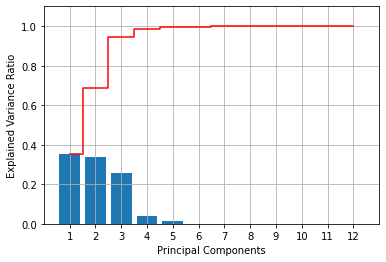

In [10]:
x_axis = range(1, len(explained_variance_ratio)+1)
plt.bar(x_axis, explained_variance_ratio,
        align = 'center', label = 'Individual Explained Variance Ratio')
plt.step(x_axis, np.cumsum(explained_variance_ratio),
         where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
plt.ylim(0, 1.1)
plt.xticks(x_axis)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()


In [11]:
pd.DataFrame(np.cumsum(explained_variance_ratio[:12]), 
                    index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'], 
                    columns=['Cum_V_ration'])

,Cum_V_ration
PC1,0.352948
PC2,0.688387
PC3,0.946816
PC4,0.984280
PC5,0.996571
PC6,0.997618
PC7,0.998494
PC8,0.999229
PC9,0.999784
PC10,0.999959


In [12]:
pcs = pca.fit_transform(short_liabilities)

In [13]:
n_of_pcs = 3 # must be less than 10
print("PC의 설명력 : {:.3f}%".format(np.sum(explained_variance_ratio[:n_of_pcs]*100)))
pca_data1 = pd.DataFrame(pcs[:,:n_of_pcs], 
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'][:n_of_pcs])

PC의 설명력 : 94.682%


In [14]:
pca_data1

,PC1,PC2,PC3
0,-12.755177,-34.844161,-38.107269
1,0.321285,1.208420,-64.154250
2,-13.605591,-31.406260,-64.822594
3,-9.266648,-27.398598,-23.859532
4,-12.150493,-34.791204,-18.831779
...,...,...,...
6815,-13.691508,-5.632331,20.735285
6816,-14.666639,-25.778566,-57.793772
6817,-14.465232,9.595827,-58.319422
6818,-14.210309,-33.318559,-5.434724


# PCA with total liabilities

In [15]:
pca = PCA(n_components=total_liabilities.shape[1])
pca.fit(total_liabilities)

PCA(n_components=5)

In [16]:
explained_variance_ratio = pca.explained_variance_ratio_

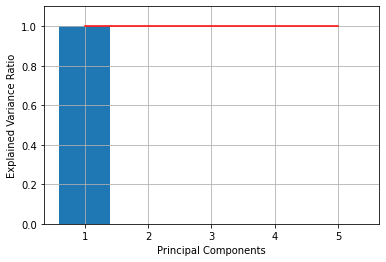

In [17]:
x_axis = range(1, len(explained_variance_ratio)+1)
plt.bar(x_axis, explained_variance_ratio,
        align = 'center', label = 'Individual Explained Variance Ratio')
plt.step(x_axis, np.cumsum(explained_variance_ratio),
         where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
plt.ylim(0, 1.1)
plt.xticks(x_axis)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()


In [18]:
pd.DataFrame(np.cumsum(explained_variance_ratio[:5]), 
                    index=['PC1','PC2','PC3','PC4','PC5'], 
                    columns=['Cum_V_ration'])

,Cum_V_ration
PC1,0.999964
PC2,0.999994
PC3,1.000000
PC4,1.000000
PC5,1.000000


In [19]:
pcs = pca.fit_transform(total_liabilities)

In [20]:
n_of_pcs = 1 # must be less than 10
print("PC의 설명력 : {:.3f}%".format(np.sum(explained_variance_ratio[:n_of_pcs]*100)))
pca_data2 = pd.DataFrame(pcs[:,:n_of_pcs], 
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'][:n_of_pcs])

PC의 설명력 : 99.996%


In [21]:
pca_data2

,PC1
0,-113.180388
1,-117.884351
2,-113.007370
3,-29.912376
4,-174.490371
...,...
6815,-143.109356
6816,-143.758574
6817,-99.200378
6818,-155.005084


# PCA with other variables

In [22]:
pca = PCA(n_components=others.shape[1])
pca.fit(others)

PCA(n_components=46)

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_

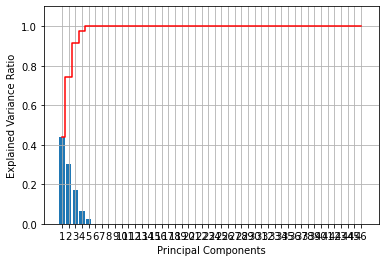

In [24]:
x_axis = range(1, len(explained_variance_ratio)+1)
plt.bar(x_axis, explained_variance_ratio,
        align = 'center', label = 'Individual Explained Variance Ratio')
plt.step(x_axis, np.cumsum(explained_variance_ratio),
         where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
plt.ylim(0, 1.1)
plt.xticks(x_axis)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [25]:
pd.DataFrame(np.cumsum(explained_variance_ratio[:5]), 
                    index=['PC1','PC2','PC3','PC4','PC5'], 
                    columns=['Cum_V_ration'])

,Cum_V_ration
PC1,0.438308
PC2,0.741454
PC3,0.913026
PC4,0.976113
PC5,0.999283


In [26]:
pcs = pca.fit_transform(others)

In [27]:
n_of_pcs = 3 # must be less than 10
print("PC의 설명력 : {:.3f}%".format(np.sum(explained_variance_ratio[:n_of_pcs]*100)))
pca_data3 = pd.DataFrame(pcs[:,:n_of_pcs], 
                        columns = ['PC1','PC2','PC3','PC4','PC5'][:n_of_pcs])

PC의 설명력 : 91.303%


In [28]:
pca_data3

,PC1,PC2,PC3
0,-2728.916005,2459.255438,-4430.253430
1,-2800.284875,-3891.321162,-8341.491832
2,-2682.318541,-4366.185082,-8174.468228
3,-3108.401932,-3260.131926,172211.781158
4,-2722.067975,-3575.126841,-8354.656628
...,...,...,...
6815,-2737.990005,6740.407485,-5730.784911
6816,-2669.057247,-531.906417,-8291.206233
6817,-2687.623789,-6354.381632,-3403.513533
6818,-2700.361483,-2890.142845,-4299.482149


In [29]:
dataset.loc[:,"class"]

0       0
1       0
2       0
3       0
4       0
       ..
6815    0
6816    0
6817    0
6818    1
6819    0
Name: class, Length: 6820, dtype: int64

In [30]:
dataset = pd.concat([pca_data1,pca_data2,pca_data3, dataset.loc[:,"class"]], axis=1)  

In [31]:
dataset

,PC1,PC2,PC3,PC1,PC1,PC2,PC3,class
0,-12.755177,-34.844161,-38.107269,-113.180388,-2728.916005,2459.255438,-4430.253430,0
1,0.321285,1.208420,-64.154250,-117.884351,-2800.284875,-3891.321162,-8341.491832,0
2,-13.605591,-31.406260,-64.822594,-113.007370,-2682.318541,-4366.185082,-8174.468228,0
3,-9.266648,-27.398598,-23.859532,-29.912376,-3108.401932,-3260.131926,172211.781158,0
4,-12.150493,-34.791204,-18.831779,-174.490371,-2722.067975,-3575.126841,-8354.656628,0
...,...,...,...,...,...,...,...,...
6815,-13.691508,-5.632331,20.735285,-143.109356,-2737.990005,6740.407485,-5730.784911,0
6816,-14.666639,-25.778566,-57.793772,-143.758574,-2669.057247,-531.906417,-8291.206233,0
6817,-14.465232,9.595827,-58.319422,-99.200378,-2687.623789,-6354.381632,-3403.513533,0
6818,-14.210309,-33.318559,-5.434724,-155.005084,-2700.361483,-2890.142845,-4299.482149,1


In [32]:
dataset.columns = ["PC1_short","PC2_short","PC3_short","PC1_total","PC1_others","PC2_others","PC3_others","class"]

In [33]:
dataset

,PC1_short,PC2_short,PC3_short,PC1_total,PC1_others,PC2_others,PC3_others,class
0,-12.755177,-34.844161,-38.107269,-113.180388,-2728.916005,2459.255438,-4430.253430,0
1,0.321285,1.208420,-64.154250,-117.884351,-2800.284875,-3891.321162,-8341.491832,0
2,-13.605591,-31.406260,-64.822594,-113.007370,-2682.318541,-4366.185082,-8174.468228,0
3,-9.266648,-27.398598,-23.859532,-29.912376,-3108.401932,-3260.131926,172211.781158,0
4,-12.150493,-34.791204,-18.831779,-174.490371,-2722.067975,-3575.126841,-8354.656628,0
...,...,...,...,...,...,...,...,...
6815,-13.691508,-5.632331,20.735285,-143.109356,-2737.990005,6740.407485,-5730.784911,0
6816,-14.666639,-25.778566,-57.793772,-143.758574,-2669.057247,-531.906417,-8291.206233,0
6817,-14.465232,9.595827,-58.319422,-99.200378,-2687.623789,-6354.381632,-3403.513533,0
6818,-14.210309,-33.318559,-5.434724,-155.005084,-2700.361483,-2890.142845,-4299.482149,1


In [34]:
import numpy as np
import pandas as pd

from pycaret.utils import version, check_metric
from pycaret.classification import *

version()

'2.3.5'

In [35]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('The shape of original Data: ' + str(dataset.shape))
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

The shape of original Data: (6820, 8)
Data for Modeling: (6479, 8)
Unseen Data For Predictions: (341, 8)


In [36]:
exp_clf101 = setup(data = data, target = 'class', session_id=2021)

,Description,Value
0,session_id,2021
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6479, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9491,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.013
ridge,Ridge Classifier,0.9482,0.0000,0.0000,0.0000,0.0000,-0.0015,-0.0022,0.017
lda,Linear Discriminant Analysis,0.9482,0.5908,0.0000,0.0000,0.0000,-0.0015,-0.0022,0.023
rf,Random Forest Classifier,0.9475,0.7142,0.0087,0.2000,0.0167,0.0122,0.0335,0.951
et,Extra Trees Classifier,0.9466,0.6813,0.0087,0.1500,0.0163,0.0104,0.0251,0.671
knn,K Neighbors Classifier,0.9462,0.6002,0.0130,0.2333,0.0244,0.0170,0.0416,0.129
ada,Ada Boost Classifier,0.9462,0.7196,0.0087,0.0667,0.0154,0.0090,0.0142,0.295
gbc,Gradient Boosting Classifier,0.9453,0.7516,0.0130,0.1167,0.0234,0.0147,0.0250,0.850
lightgbm,Light Gradient Boosting Machine,0.9449,0.7196,0.0259,0.1850,0.0446,0.0333,0.0518,0.188
dt,Decision Tree Classifier,0.9030,0.5414,0.1388,0.1199,0.1280,0.0772,0.0777,0.044


In [39]:
print(best_model)

DummyClassifier(constant=None, random_state=2021, strategy='prior')


In [40]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [41]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7159,0.4564,0.3043,0.0583,0.0979,0.0141,0.0210
1,0.7357,0.5818,0.4348,0.0855,0.1429,0.0636,0.0935
2,0.9009,0.3025,0.0000,0.0000,0.0000,-0.0521,-0.0521
3,0.6586,0.6476,0.5652,0.0823,0.1436,0.0606,0.1053
4,0.9471,0.5984,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9492,0.7729,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7020,0.5687,0.3043,0.0556,0.0940,0.0088,0.0135
7,0.9382,0.6175,0.0000,0.0000,0.0000,-0.0185,-0.0244
8,0.7108,0.5729,0.3913,0.0714,0.1208,0.0382,0.0584
9,0.6909,0.5166,0.3043,0.0534,0.0909,0.0050,0.0077


In [42]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
rf = create_model('rf')

In [ ]:
tuned_lr = tune_model(lr)

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_lr)

In [ ]:
tuned_catboost = tune_model(catboost)
# , custom_grid = {'n_neighbors' : np.arange(0,50,1)})

In [ ]:
print(tuned_catboost)

In [ ]:
tuned_rf = tune_model(rf)

In [ ]:
plot_model(tuned_catboost, plot = 'auc')

In [ ]:
plot_model(tuned_catboost, plot = 'pr')

In [ ]:
plot_model(tuned_catboost, plot='feature')

In [ ]:
plot_model(tuned_catboost, plot = 'confusion_matrix')